<a href="https://colab.research.google.com/github/jayy1809/Cars_price_prediction_model/blob/main/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline




In [ ]:
df = pd.read_csv("/data.csv")

In [ ]:
len(df)


11914

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns :
  df[col] = df[col].str.lower().str.replace(' ','_') # data preprocessing step

#here first we made the columns lower and then used underscore where there was space
#and then we made a list and added that columnns that had datatype columns
#and after that we again make every value of column as lower and underscore it

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


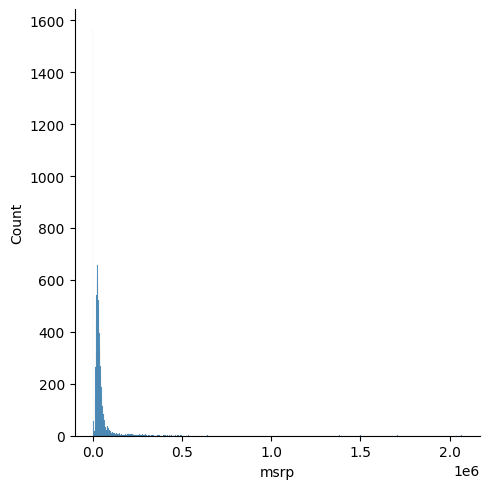

In [ ]:
sns.displot(df['msrp'], kde=False)

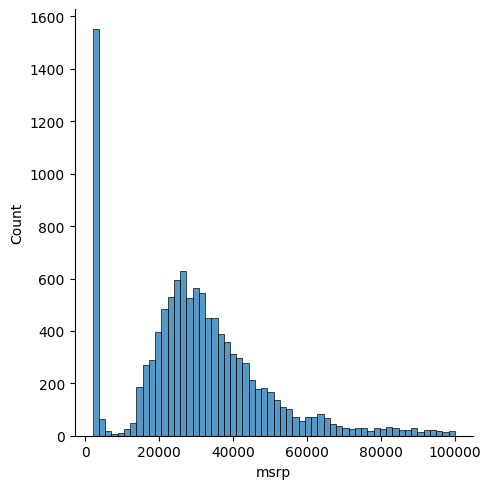

In [ ]:
sns.displot(df.msrp[df.msrp < 100000], kde=False)

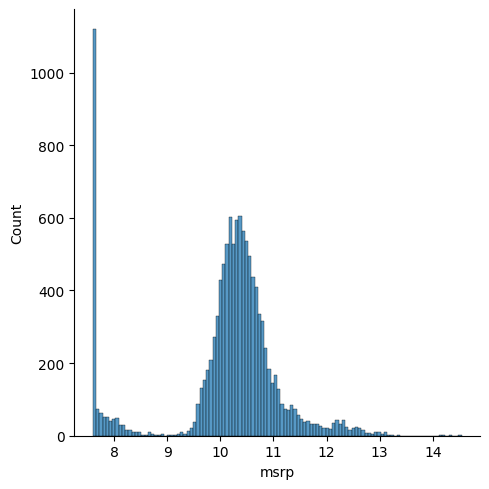

In [ ]:
log_price = np.log1p(df.msrp)

sns.displot(log_price, kde = False)

In [ ]:
df.isnull().sum() # this shows the number of values in a column that are null

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = int(0.6 * n)

np.random.seed(42)
idx = np.arange(n)      #np.arange is used to make a numpy array which will have 0 to n-1 and it can take start , stop and step values
np.random.shuffle(idx)

df_shuffled = df.iloc[idx] # iloc means integer location hence it is used to access the matrix using integers
print(df.iloc[1])          # iloc[1] will print whole first role
print()
print(df.iloc[1,2])        # iloc[1,2] will print 1st row and 2nd column

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

make                                         bmw
model                                   1_series
year                                        2011
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  300.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category               luxury,performance
vehicle_size                             compact
vehicle_style                        convertible
highway_mpg                                   28
city_mpg                                      19
popularity                                  3916
msrp                                       40650
Name: 1, dtype: object

2011


In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

print(y_train)

[10.29876764 10.32535081 10.53611479 ...  9.90228683  9.94707372
  9.83258214]


In [ ]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
def linear_regression(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  # print(w[0], w[1:])
  return w[0] , w[1:]

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [ ]:
df_num = df_num.fillna(0)
#df.iloc[:, 4] : means all row of csv and 4th column
#we can fill the mean values as well for that we can do something like

# import pandas as pd

# # Load the CSV file into a DataFrame
# df = pd.read_csv('data.csv')

# # Calculate the mean of the specific column (column number 5)
# column_mean = df.iloc[:, 4].mean()  # Replace 4 with the actual column number (zero-based index)

# # Fill the missing value in the specific column with the calculated mean
# df.iloc[:, 4].fillna(column_mean, inplace=True)  # Replace 4 with the actual column number

# # Save the filled DataFrame back to a CSV file
# df.to_csv('data_filled.csv', index=False)


In [ ]:
X_train = df_num.values
print(X_train)

[[ 275.    6.   18.   13.  549.]
 [ 170.    4.   38.   25.  873.]
 [ 248.    6.   28.   19. 2202.]
 ...
 [ 207.    6.   17.   14.  586.]
 [ 201.    4.   29.   21. 1720.]
 [ 150.    4.   24.   17. 1851.]]


In [ ]:
w_0, w = linear_regression(X_train, y_train)
print(w_0, w)

7.905001395296216 [ 9.35429626e-03 -1.38288503e-01  1.49610547e-02  1.51002200e-02
 -1.97268272e-05]


In [ ]:
y_pred = w_0 + X_train.dot(w)
print(y_pred)

[10.10247366  9.8708818  10.05751109 ...  9.46579079  9.94910599
  9.33424652]


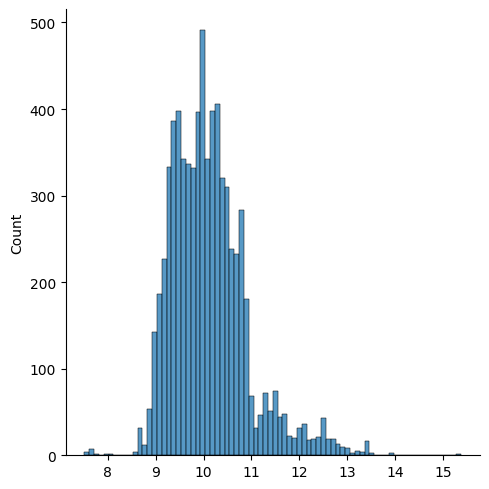

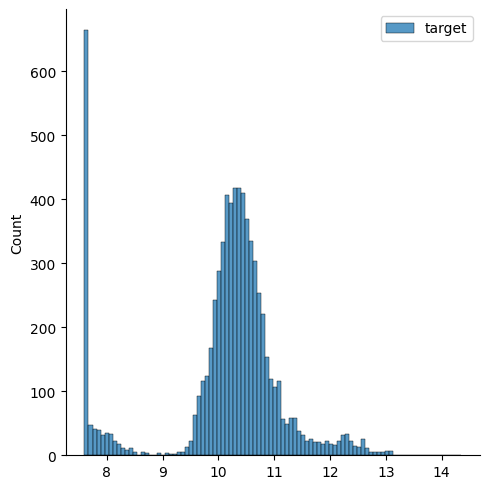

In [ ]:
sns.displot(y_pred,label='prediction')
sns.displot(y_train, label='target')
plt.legend()

In [ ]:
def rmse(y, y_pred):
  error = y_pred - y        # here we are subtracting one one array from another and array is created of errors
  mse = (error ** 2).mean() # here each element of error array is squared and then its mean is taken
  return np.sqrt(mse)       # we return the square root of the mse

# here we used vectorization and we get multiple benefit from them

In [ ]:
rmse(y_train, y_pred)

0.7571101500325634

In [ ]:
# now we will use the validation part of our data

df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [ ]:
y_pred = w_0 + X_val.dot(w)


In [ ]:
rmse(y_val, y_pred)

0.7395986814668115

In [ ]:
# this is just another way of doing above things as code was being duplicated functions are created
def prepare_X(df):
 df_num = df[base]
 df_num = df_num.fillna(0)
 X = df_num.values
 return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.7395986814668115


In [ ]:
#now we will add one more age feature of ca rso we can reduce the rmse(root mean square error)

def prepare_X(df):
  df = df.copy()          # here we create a copy of data frame so there is no error
  features = base.copy()  # here we create a copy of base features

  df['age'] = 2023 - df.year # here we create a new column age to add one more feature
  features.append('age')     # here we append our new feature age to the features list

  df_num = df[features]      # here we created a new dataframe only with values of features list
  df_num = df_num.fillna(0)  # filled all the values with 0
  X = df_num.values          # here we convert the dataframe into numpy array easily with df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print("validation : ",rmse(y_val, y_pred))

validation :  0.5133027773064018


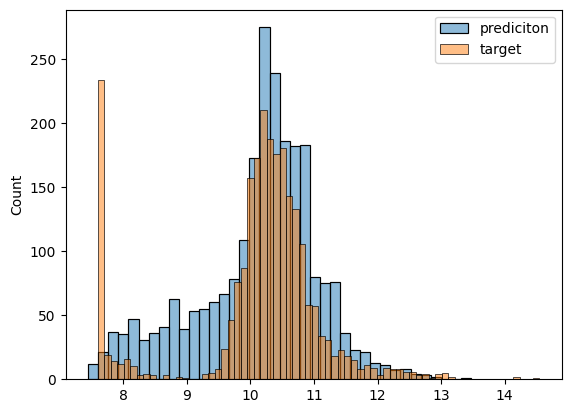

In [ ]:
sns.histplot(y_pred, label='prediciton', alpha=0.5)
sns.histplot(y_val, label='target', alpha=0.5)
plt.legend()

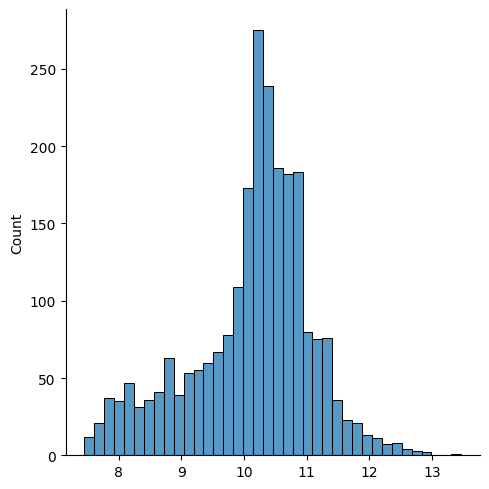

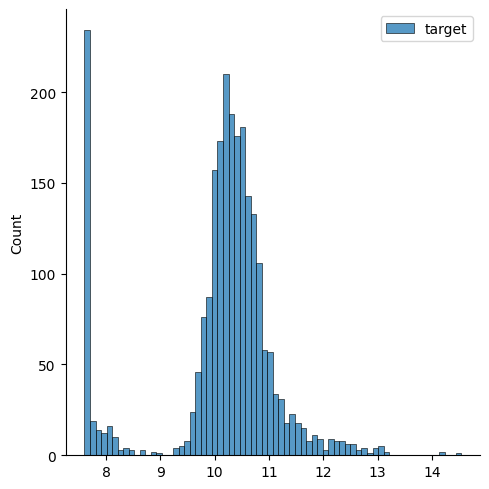

In [ ]:
#if you want both the graphs to overlap then use histplot and make the alpha variable to 0.5
#and if you want to display it differently then you use normal displot

sns.displot(y_pred, label='prediction')
sns.displot(y_val, label='target')
plt.legend()

In [ ]:
# now we will handle catergorical values like texts till now we were dealing with numerical values
# but what if text values come? then we have to do encoding , famous one is ONE-HOT ENCODING

#this is just there to understand

for v in [2, 3, 4] :
  feature = 'num_doors_%s' % v
  value = (df['number_of_doors'] == v).astype(int)
  df[feature] = value
  # base.append(feature) #here in book it says features.append() but here we have our features in base array so we do this


In [ ]:
(df['number_of_doors'] == v).astype(int)
# here we are converting boolean type true false into integers like 0 , 1
# and in == v here we are selectting what v is that is number of doors  = 2,3,4 and then it sees
# if number of doors is 2 for v=2 hence true and hence 1


0        0
1        0
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    1
Name: number_of_doors, Length: 11914, dtype: int64

In [ ]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [ ]:
#now we will create a new feature which will be is_make
#this is there to understand as well
for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
 feature = 'is_make_%s' % v
 df[feature] = (df['make'] == v).astype(int)
 #base.append(feature)

In [ ]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()
  df['age'] = 2023 - df.year
  features.append('age')

  # we can do more feature engineering if we want but it can then increase the RMSE value as well
  # adding more features doesnt mean that our final RMSE would reduce it can increase as well
  # because we will be using same columns multiplied by some constant as new feature sometimes
  # so our columns have very similar values and while INVERTING it det(X) = 0 can be 0 so we might get linAlg error

  for v in [2, 3, 4]:
    feature = 'num_doors_%s' % v
    df[feature] = (df['number_of_doors'] == v).astype(int)
    features.append(feature)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' % v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
#now again we will check our models RMSE and validate it whether adding new features helped us or not

X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5014361247691898


In [ ]:
def prepare_X(df):

  df = df.copy()
  features = base.copy()
  df['age'] = 2023 - df.year
  features.append('age')

  for v in [2, 3, 4] :
    feature = 'num_doors_%s' % v
    df[feature] = (df['number_of_doors'] == v).astype(int)
    features.append(feature)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' % v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)

  for v in ['automatic', 'manual', 'automated_manual'] :
    feature = 'is_transmission_%s' % v
    df[feature] = (df['transmission_type'] == v).astype(int)
    features.append(feature)

  for v in ['regular_unleaded', 'premium_unleaded_(required)',
            'premium_unleaded_(recommended)',
            'flex-fuel_(unleaded/e85)']:
    feature = 'is_type_%s' % v
    df[feature] = (df['engine_fuel_type'] == v).astype(int)
    features.append(feature)

  for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
    feature = 'is_style_%s' % v
    df[feature] = (df['vehicle_style'] == v).astype(int)
    features.append(feature)

  # for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
  #   feature = 'is_mc_%s' % v
  #   df[feature] = (df['market_category'] == v).astype(int)
  #   features.append(feature)


  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.4612258372780429


In [ ]:
# now we will do regularization of our outcome , we do regularization to add a penalty term to the loss function
# encouraging  the model to have smaller-weights
'''
we use regularization to prevent overfitting of a model, which occurs when model fits the training data too closely
and performs poorly on unseen data

There are 2 types of regularizaiton , LASSO(L1) and RIDGE(L2)
LASSO can make some coefficients 0 as well
RIDGE encourages all coefficients to be small which can prevent large fluctuation

w = (X^T.X + (alpha)I)^-1. X^T.y this is the regularized normal equation where I is the identity matrix
'''

XTX = X_train.T.dot(X_train)
XTX = XTX + 0.01 * np.eye(XTX.shape[0]) # here XTX.shape gives a tuple containing he number of rows and column
                                        # hence XTX.shape[0] gives number of rows in XTX matrix
# print(XTX)


In [ ]:
#     LINEAR REGRESSION WITH REGULARIZATION

def linear_regression_regularized(X, y, r=0.0) :
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  regularization = r * np.eye(XTX.shape[0])
  XTX = XTX + regularization

  XTX_inv = np.linalg.inv(XTX)

  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [ ]:
# here in the regularized normal equation our alpha is the HYPERPARAMETER that we have to set
# hyperparameter is a parameter that cant be learned from data and we have to set it on our own

for r in [0, 0.001, 0.01, 0.1, 1, 10] :
  w_0, w = linear_regression_regularized(X_train, y_train, r=r)
  print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 12.29, -0.10, -0.10
0.001, 12.28, -0.10, -0.10
 0.01, 12.24, -0.10, -0.10
  0.1, 11.83, -0.10, -0.10
    1, 9.65, -0.09, -0.11
   10, 6.13, -0.08, -0.15


In [ ]:
# lets keep alpha or say r as 0.01 and see what our final rmse is ?

X_train = prepare_X(df_train)
w_0, w = linear_regression_regularized(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.46122211225596915


In [ ]:
# lets run a grid search to find the optimal value for hyperparameter

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
 w_0, w = linear_regression_regularized(X_train, y_train, r=r)
 y_pred = w_0 + X_val.dot(w)
 print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4612258335331556
0.0001 0.46122546300043255
 0.001 0.46122211225596915
  0.01 0.4611903294448707
   0.1 0.46101660196425304
     1 0.4633719477888396
     5 0.4741013095732637
    10 0.4843467587319928


In [ ]:
# lets finalize alpha or r to be 0.01 as no more changes are there from there on below and above there are huge changes
X_train = prepare_X(df_train)
w_0, w = linear_regression_regularized(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))


validation: 0.4611903294448707
test: 0.4582391388353464


In [ ]:
# now lets test out our model on the base of features what will be its price

ad = {
 'city_mpg': 18,
 'driven_wheels': 'all_wheel_drive',
 'engine_cylinders': 6.0,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'highway_mpg': 25,
 'make': 'toyota',
 'market_category': 'crossover,performance',
 'model': 'venza',
 'number_of_doors': 4.0,
 'popularity': 2031,
 'transmission_type': 'automatic',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'year': 2013
}

In [ ]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [ ]:
y_pred = w_0 + X_test.dot(w)

In [ ]:
# earlier we had took the log hence we need to reverse that so we use exponent to reverse it and get real value
suggested_price = np.expm1(y_pred)
print(suggested_price)

# the price of real car is 31,120 dollars and our model predicted 28503 dollars which is pretty close

[28503.62502303]
